In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

np.random.seed(5)

Let's start by generating some data.

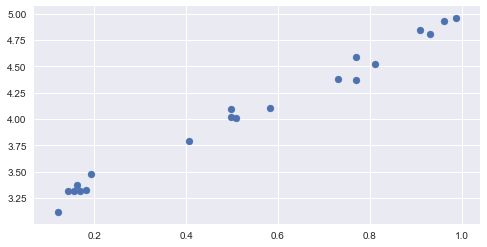

In [5]:
def linear_map(w1, w2, x):
    return w1 * x + w2

def data_split(x, y):

    train_inds = np.random.choice(list(range(len(x))), 20, replace=False)

    x_train, y_train = [x[x_] for x_ in train_inds], [y[y_] for y_ in train_inds]
    x_test,  y_test  = [x_ for x_ in x if x_ not in x_train], [y_ for y_ in y if y_ not in y_train]
    
    return x_train, y_train, x_test, y_test

# noisy input data 
fig, ax = plt.subplots(figsize=(8,4))

w1, w2 = 2,3

x = np.random.rand(30)
y = [linear_map(w1, w2, x_) + np.random.normal(0,.1) for x_ in x]

x_train, y_train, x_test, y_test = data_split(x,y)


ax.scatter(x_train, y_train)
#ax.scatter(x_test, y_test)

plt.show()

## Analytical solution

Using the least squares

L = 1/N ( (t - Xw).T * (t - Xw) ) 

In [39]:
def ls_loss(X, w, t):
    N = len(X)
    expr1 = t - np.matmul(X,w)
    expr2 = t - np.matmul(X,w)
    
    loss = 1/N * (expr1.T * expr2)
    
    return np.sum(loss)

X = np.array([(x,1) for x in x_train])
t = np.array(y_train)


## e.g.
## the weights that generated the data should have a low loss
print('This should be small: ', ls_loss(X,np.array([2,3]),t))

# and different weights should have high loss
print('This should be large: ', ls_loss(X,np.array([3,3]),t))

This should be small:  0.004795116577117648
This should be large:  0.4027193496906409


The partial derivative wrt. w is:

    = 2/N (X.T Xw) - 2/N X.T t
    
To find minima, we can equate this to 0:

    0            = 2/N (X.T Xw) - 2/N X.T t
    2/N (X.T Xw) = 2/N X.T t
    (X.T Xw)     = X.T t
              Iw = (X.T X)^(-1) X.T t
             
So we can analytically find the minima of this loss function:

[1.95492999 3.00606675]


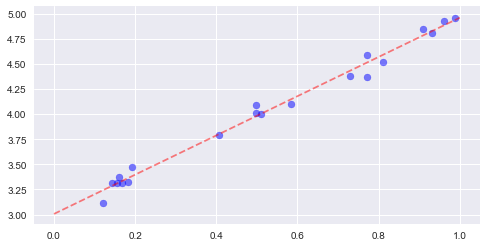

In [51]:
best_weights = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, t))
print(best_weights)


x = np.linspace(0,1,100)


## plot the line 
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(x_train, y_train, color='b', alpha=.5)
ax.plot(x, linear_map(best_weights[0],best_weights[1], x), linestyle='--', color='r', alpha=.5)

plt.show()

## MML Treatment

Given some inputs $x \in {R}^{D} $ and associated labels $y \in {R}^{D}$ we want to determine a function $y = f(x) + \epsilon$.

To score our function, we will calculate the likelihood of our data (based on our model):

$$
p(x | y) = \mathcal{N}(y | f(x), \sigma^2 )
$$

The likelihood is the PDF of $y$ evaluated at a specific $x^{\top}\theta$.


In [42]:
def least_squares(outputs, targets):
    return ((np.sum(outputs - targets)**2))